In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Wasim Haidar\Desktop\supermarket_sales_mock.csv')

# Preview data
df.head()


,Invoice ID,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,INV-1000,Mandalay,Female,Health,91.04,6,27.31,573.55,2024-01-01,Cash
1,INV-1001,Yangon,Female,Clothing,66.98,6,20.09,421.97,2024-01-02,Ewallet
2,INV-1002,Mandalay,Female,Electronics,40.51,5,10.13,212.68,2024-01-03,Cash
3,INV-1003,Mandalay,Male,Health,41.43,1,2.07,43.50,2024-01-04,Ewallet
4,INV-1004,Yangon,Male,Health,75.34,8,30.14,632.86,2024-01-05,Credit card


In [3]:
# Summary statistics
df.describe()


,Unit price,Quantity,Tax 5%,Total
count,100.000000,100.000000,100.0000,100.000000
mean,58.371200,4.640000,13.2935,279.160800
std,26.331346,2.439241,9.6293,202.217468
min,10.460000,1.000000,1.2200,25.690000
25%,36.480000,3.000000,5.0150,105.315000
50%,61.985000,5.000000,10.8350,227.515000
75%,81.552500,7.000000,19.3000,405.220000
max,99.100000,9.000000,40.5400,851.440000


In [4]:
# Check for missing values
df.isnull().sum()


Invoice ID      0
City            0
Gender          0
Product line    0
Unit price      0
Quantity        0
Tax 5%          0
Total           0
Date            0
Payment         0
dtype: int64

In [5]:
# Drop missing values
df.dropna(inplace=True)

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure 'Total' is numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df.dropna(subset=['Total'], inplace=True)


In [6]:
# Add Month and Day (if 'Date' column is available)
if 'Date' in df.columns:
    df['Month'] = df['Date'].dt.to_period('M').astype(str)
    df['Day'] = df['Date'].dt.day_name()
    

In [7]:
# Using IQR method for 'Total'
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]


In [8]:
sales_by_city = df.groupby('City')['Total'].sum().reset_index()
sales_by_city


,City,Total
0,Mandalay,8482.06
1,Naypyitaw,10293.82
2,Yangon,9140.20


C:\Users\Wasim Haidar\AppData\Local\Temp\ipykernel_17936\3439588480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_city, x='City', y='Total', palette='pastel')


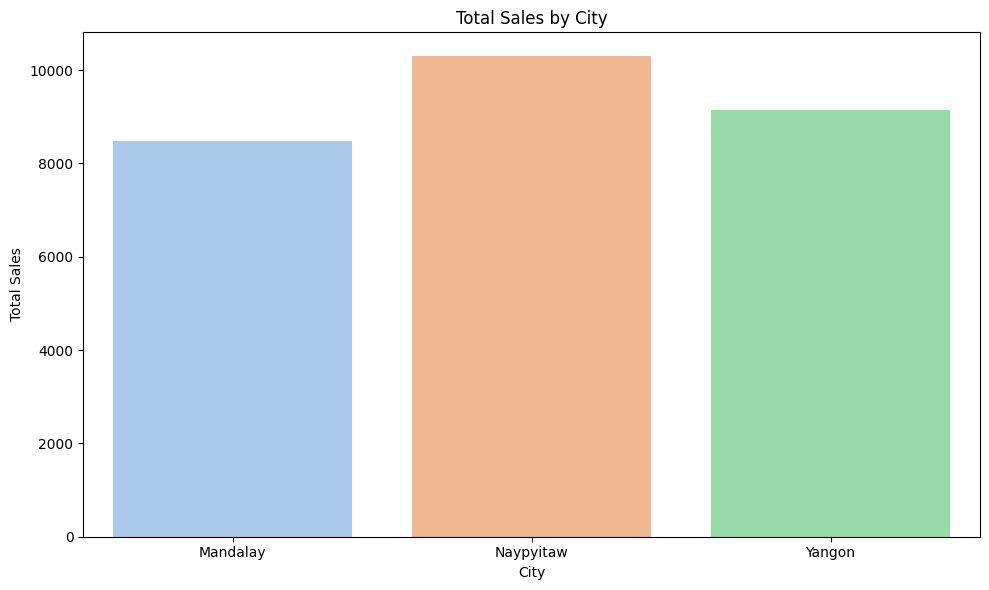

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_city, x='City', y='Total', palette='pastel')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()


In [10]:
# Ensure the 'output' folder exists
output_folder = r'C:\Users\Wasim Haidar\Desktop\super_market_sales_analysis\output'
os.makedirs(output_folder, exist_ok=True)

# Save the plot
plt.savefig(f'{output_folder}/city_sales.png')


<Figure size 640x480 with 0 Axes>

In [11]:
plt.show()
